**1.- Carga de librerías y dataset**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.datasets import fetch_california_housing, fetch_openml
import statsmodels.api as sm


# Dataset 1: California Housing
california = fetch_california_housing(as_frame=True)
X_cal, y_cal = california.data, california.target
df_cal = pd.concat([X_cal, y_cal], axis=1)

# Dataset 2: Adult Income
adult = fetch_openml("adult", version=2, as_frame=True)
df_adult = adult.frame.dropna()

# Dataset 3: Datos macroeconómicos
macro = sm.datasets.macrodata.load_pandas().data
macro = macro[['realgdp', 'realcons', 'realinv']]



**2.- Análisis de Datos de California Housing**

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.09952

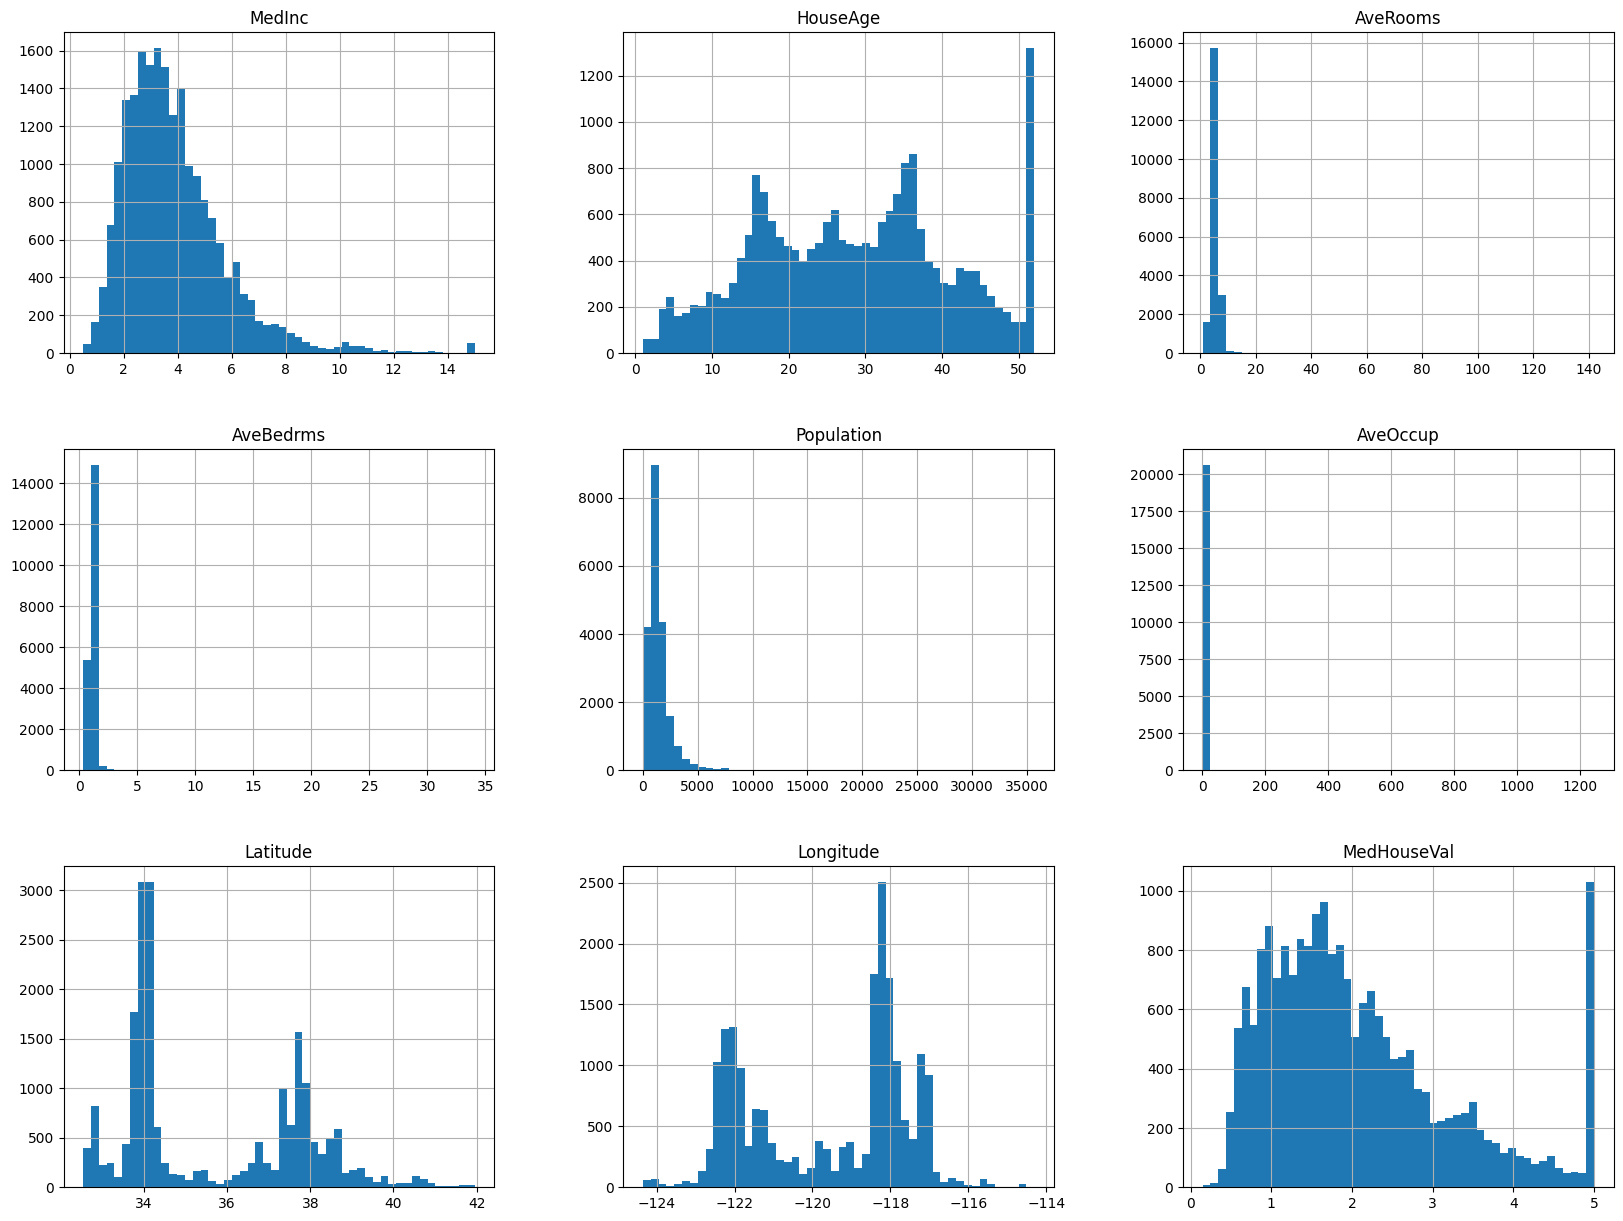

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

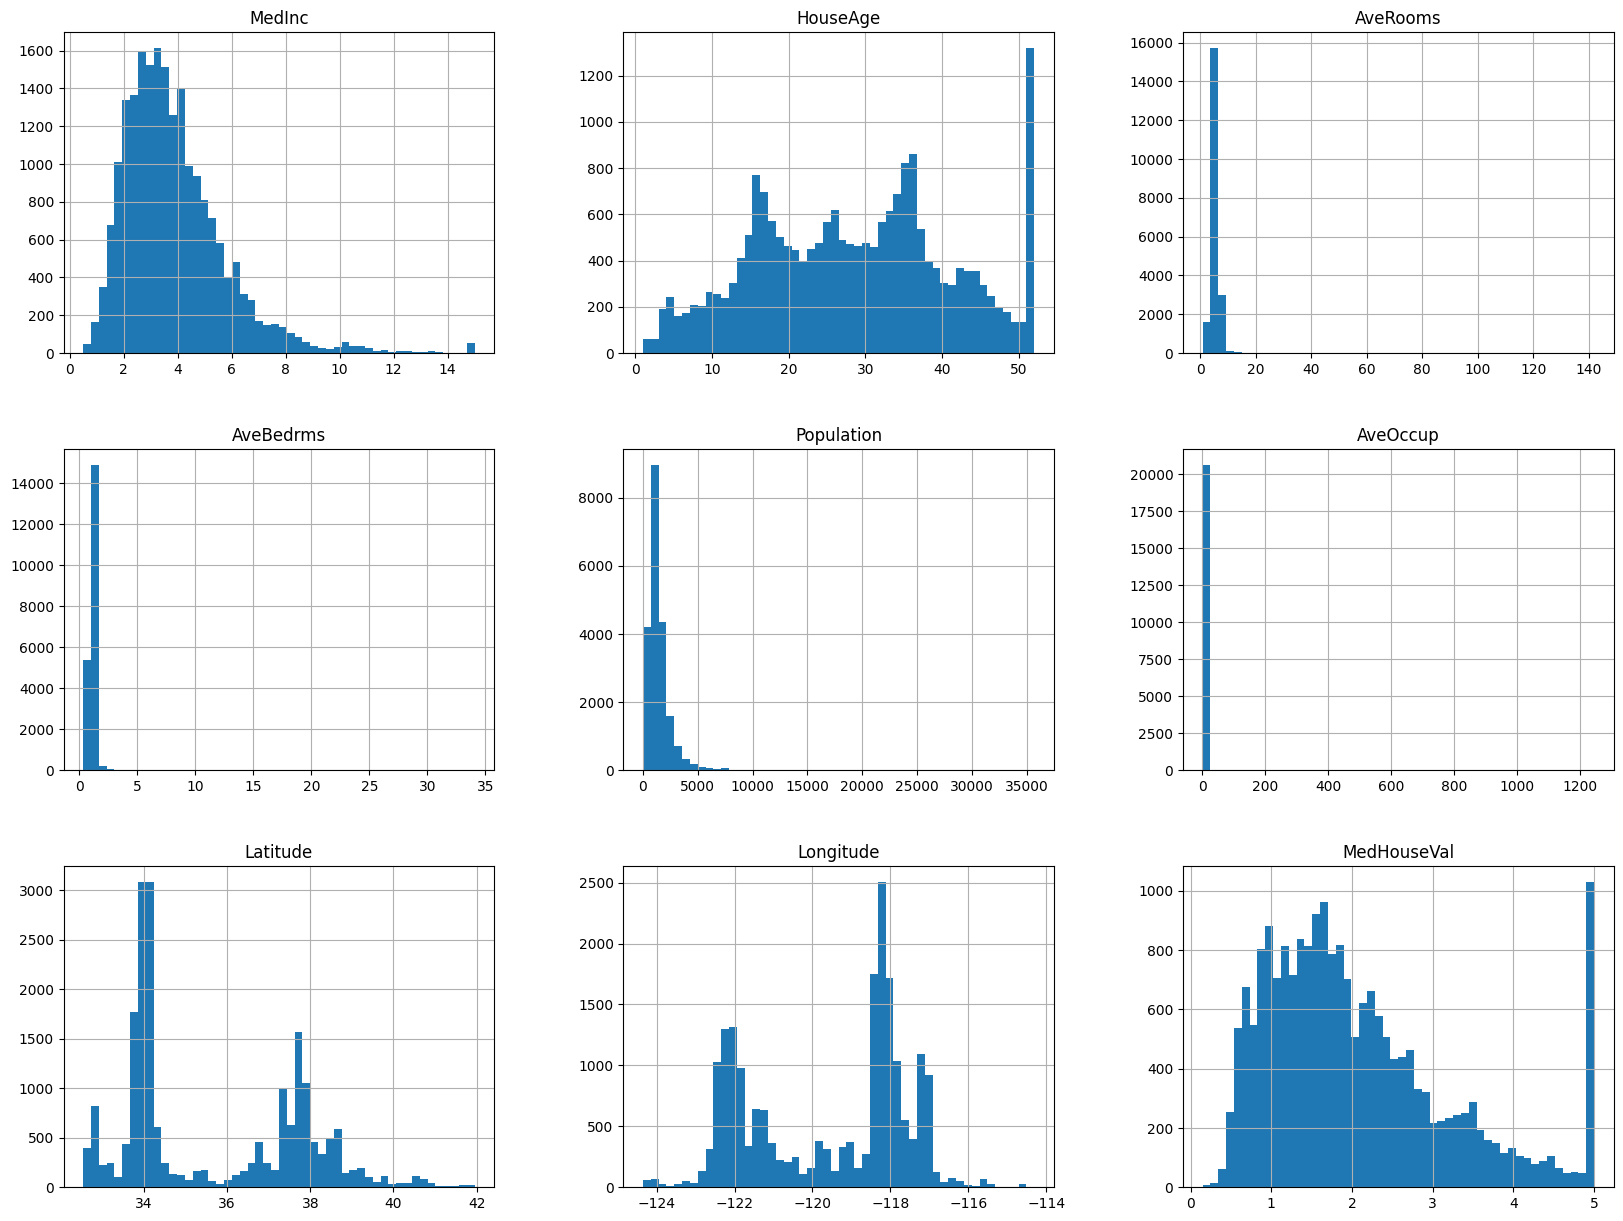

Número de casas caras: 1071
Porcentaje de casas caras: 5.19%
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
89      1.2434      52.0  2.929412   0.917647       396.0  4.658824     37.80   
140     6.3624      30.0  5.615385   0.730769       126.0  2.423077     37.81   
459     1.1696      52.0  2.436000   0.944000      1349.0  5.396000     37.87   
489     3.0417      48.0  4.690632   1.126362      1656.0  3.607843     37.86   
493     7.8521      52.0  7.794393   1.051402       517.0  2.415888     37.86   
...        ...       ...       ...        ...         ...       ...       ...   
20422   5.1457      35.0  6.958333   1.217593       576.0  2.666667     34.14   
20426  10.0472      11.0  9.890756   1.159664       415.0  3.487395     34.18   
20427   8.6499       4.0  7.236059   1.032528      5495.0  2.553439     34.19   
20436  12.5420      10.0  9.873315   1.102426      1179.0  3.177898     34.21   
20443   3.3438      50.0  5.342857   0.942857   

In [ ]:
####################################################################################
#  California Housing
####################################################################################

print(df_cal.isnull().sum())
print(df_cal.dtypes)
print(df_cal.describe(include='all'))


df_cal.hist(bins=50, figsize=(20,15))
plt.show()


df_cal.drop_duplicates(inplace=True)

print(df_cal.describe(include='all'))

df_cal.hist(bins=50, figsize=(20,15))
plt.show()



Q1 = df_cal['MedHouseVal'].quantile(0.25)
Q3 = df_cal['MedHouseVal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

casas_caras = df_cal[df_cal['MedHouseVal'] > upper_bound]

print(f"Número de casas caras: {len(casas_caras)}")
print(f"Porcentaje de casas caras: {len(casas_caras) / len(df_cal) * 100:.2f}%")
print(casas_caras)


# Función para encontrar atípicos usando la regla del 1.5 * IQR
def find_iqr_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar el DataFrame para obtener solo los valores atípicos
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # También podemos devolver los límites para referencia
    return outliers, lower_bound, upper_bound

# Encontrar atípicos para 'MedInc'
outliers_medinc, lower_bound_medinc, upper_bound_medinc = find_iqr_outliers(df_cal, 'MedInc')

# Encontrar atípicos para 'MedHouseVal'
outliers_medhouseval, lower_bound_medhouseval, upper_bound_medhouseval = find_iqr_outliers(df_cal, 'MedHouseVal')

print(f"Límites para MedInc: [{lower_bound_medinc:.2f}, {upper_bound_medinc:.2f}]")
print(f"Número de atípicos para MedInc: {len(outliers_medinc)}")
print(f"Límites para MedHouseVal: [{lower_bound_medhouseval:.2f}, {upper_bound_medhouseval:.2f}]")
print(f"Número de atípicos para MedHouseVal: {len(outliers_medhouseval)}")


X_cal=df_cal.drop('MedHouseVal', axis=1)
y_cal=df_cal['MedHouseVal']

X_cal_train, X_cal_test, y_cal_train, y_cal_test = train_test_split(
    X_cal, y_cal, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_cal_train_scaled = scaler.fit_transform(X_cal_train)
X_cal_test_scaled = scaler.transform(X_cal_test)






**3.- Análisis de Datos de Dataset Adult**

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45222 non-null  int64   
 1   workclass       45222 non-null  category
 2   fnlwgt          45222 non-null  int64   
 3   education       45222 non-null  category
 4   education-num   45222 non-null  int64   
 5   marital-status  45222 non-null  category
 6   occupation      45222 non-null  category
 7   relationship    45222 non-null  category
 8   race            45222 non-null  category
 9   sex             45222 non-null  category
 10  capital-gain    45222 non-null  int64   
 11  capital-loss    45222 non-null  int64   
 12  hours-per-week  45222 non-null  int64   
 13  native-country  45222 non-null  category
 14  class           45222 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.8 MB


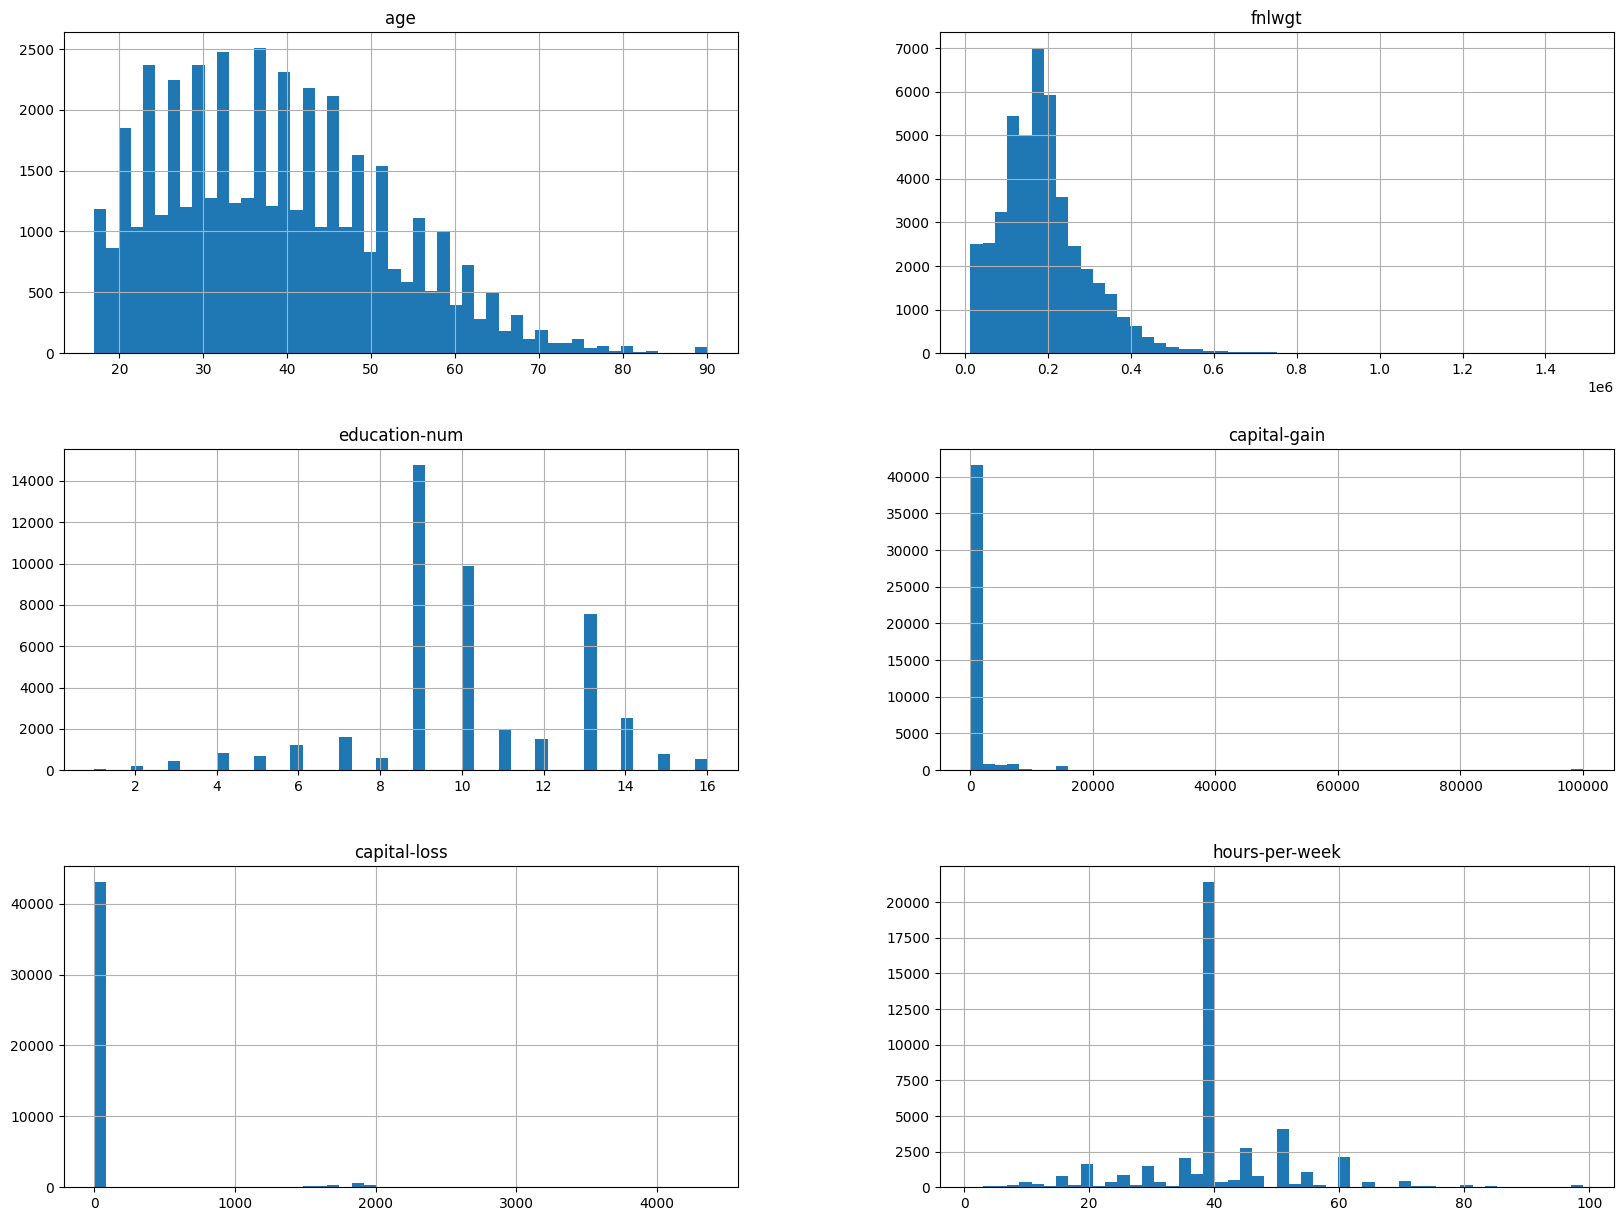

/tmp/ipython-input-16-3077211641.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adult["class"] = (df_adult["class"] == ">50K").astype(int)


In [ ]:

df_adult.info()
df_adult.describe()

df_adult.hist(bins=50, figsize=(20,15))
plt.show()

df_adult["class"] = (df_adult["class"] == ">50K").astype(int)

df_adult.head()

# Definir target para REGRESIÓN: 'fnlwgt'
y_adult = df_adult["fnlwgt"].astype(float)
X_adult = df_adult.drop(columns=["fnlwgt"])

# One-Hot Encoding
X_adult_encoded = pd.get_dummies(X_adult, drop_first=True)

# División en entrenamiento y prueba
X_adult_train, X_adult_test, y_adult_train, y_adult_test= train_test_split(
    X_adult_encoded, y_adult, test_size=0.2, random_state=42
)

# Escalado para modelos lineales
scaler_r = StandardScaler()
X_adult_train_scaled = scaler_r.fit_transform(X_adult_train)
X_adult_test_scaled = scaler_r.transform(X_adult_test)





**4.- Análisis de Datos de Dataset Macroeconómico**

<bound method DataFrame.info of        realgdp  realcons   realinv
0     2710.349    1707.4   286.898
1     2778.801    1733.7   310.859
2     2775.488    1751.8   289.226
3     2785.204    1753.7   299.356
4     2847.699    1770.5   331.722
..         ...       ...       ...
198  13324.600    9267.7  1990.693
199  13141.920    9195.3  1857.661
200  12925.410    9209.2  1558.494
201  12901.504    9189.0  1456.678
202  12990.341    9256.0  1486.398

[203 rows x 3 columns]>



            realgdp     realcons      realinv
count    203.000000   203.000000   203.000000
mean    7221.171901  4825.293103  1012.863862
std     3214.956044  2313.346192   585.102267
min     2710.349000  1707.400000   259.764000
25%     4440.103500  2874.100000   519.147500
50%     6559.594000  4299.900000   896.210000
75%     9629.346500  6398.150000  1436.681500
max    13415.266000  9363.600000  2264.721000





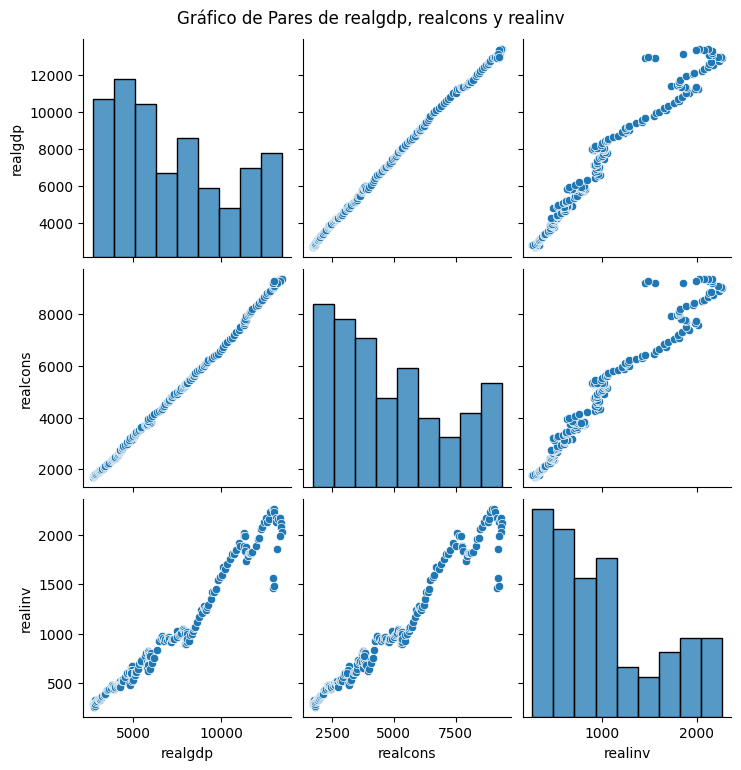

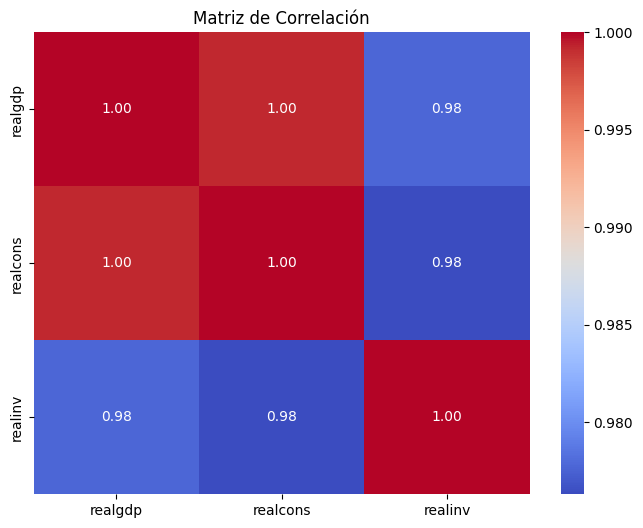

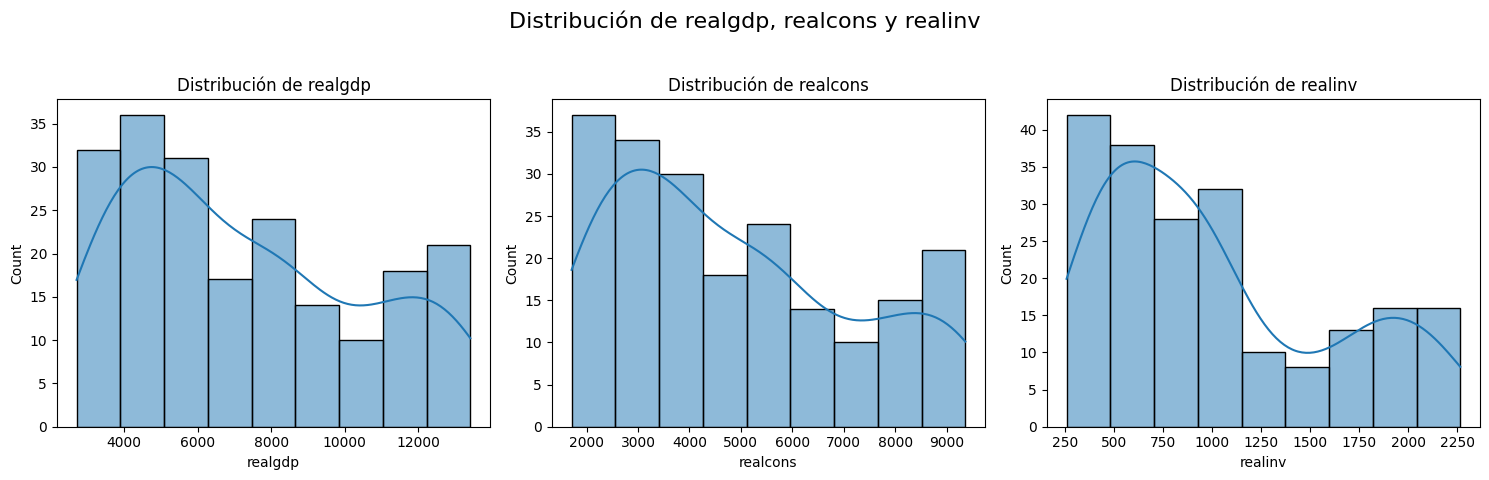

In [ ]:

print(macro.info)
print("\n\n")
print(macro.describe())
print("\n\n")

# Creación de la matriz de gráficos de dispersión (pairplot)
sns.pairplot(macro)
plt.suptitle('Gráfico de Pares de realgdp, realcons y realinv', y=1.02)
plt.show()

# Creación de la matriz de correlación (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(macro.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Histograma de cada variable para ver la distribución
plt.figure(figsize=(15, 5))
plt.suptitle('Distribución de realgdp, realcons y realinv', fontsize=16)

plt.subplot(1, 3, 1)
sns.histplot(macro['realgdp'], kde=True)
plt.title('Distribución de realgdp')

plt.subplot(1, 3, 2)
sns.histplot(macro['realcons'], kde=True)
plt.title('Distribución de realcons')

plt.subplot(1, 3, 3)
sns.histplot(macro['realinv'], kde=True)
plt.title('Distribución de realinv')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#
# Separación de datos
#

X_macro = macro.drop('realgdp', axis=1)
y_macro = macro['realgdp']

X_macro_train, X_macro_test, y_macro_train, y_macro_test = train_test_split(
    X_macro, y_macro, test_size=0.2, random_state=42
)

scaler_m = StandardScaler()
X_macro_train_scaled = scaler_m.fit_transform(X_macro_train)
X_macro_test_scaled = scaler_m.transform(X_macro_test)









5.-Elastic Net

In [ ]:
# Elastic Net para California Housing

val_alpha = 0.1
val_l1_ratio = 0.5

en_cal = ElasticNet(alpha=val_alpha, l1_ratio=val_l1_ratio, random_state=42)
en_cal.fit(X_cal_train_scaled, y_cal_train)

# Predicciones y evaluación
y_cal_pred = en_cal.predict(X_cal_test_scaled)
rmse_cal = np.sqrt(mean_squared_error(y_cal_test, y_cal_pred))
r2_cal = r2_score(y_cal_test, y_cal_pred)

print("\nCalifornia Housing - Elastic Net:")
print(f"RMSE: {rmse_cal:.4f}")
print(f"R²: {r2_cal:.4f}")


# Elastic Net para Adult Income
en_adult = ElasticNet(alpha=val_alpha, l1_ratio=val_l1_ratio, random_state=42)
en_adult.fit(X_adult_train_scaled, y_adult_train)

# Predicciones y evaluación
y_adult_pred = en_adult.predict(X_adult_test_scaled)
rmse_adult = np.sqrt(mean_squared_error(y_adult_test, y_adult_pred))
r2_adult = r2_score(y_adult_test, y_adult_pred)

print("\nAdult Income - Elastic Net (fnlwgt como target):")
print(f"RMSE: {rmse_adult:.4f}")
print(f"R²: {r2_adult:.4f}")

# Elastic Net para Macro Data
en_macro = ElasticNet(alpha=val_alpha, l1_ratio=val_l1_ratio, random_state=42)
en_macro.fit(X_macro_train_scaled, y_macro_train)

# Predicciones y evaluación
y_macro_pred = en_macro.predict(X_macro_test_scaled)
rmse_macro = np.sqrt(mean_squared_error(y_macro_test, y_macro_pred))
r2_macro = r2_score(y_macro_test, y_macro_pred)

print("\nMacro Data - Elastic Net:")
print(f"RMSE: {rmse_macro:.4f}")
print(f"R²: {r2_macro:.4f}")




California Housing - Elastic Net:
RMSE: 0.7974
R²: 0.5148

Adult Income - Elastic Net (fnlwgt como target):
RMSE: 102499.4969
R²: 0.0541

Macro Data - Elastic Net:
RMSE: 263.7982
R²: 0.9927


**6.- Regresión Cuantílica**

California Housing Dataset

Quantile 0.1:
Pinball Loss: 0.1418

Top 5 Features:
      Feature  Coefficient
0      MedInc          0.0
1    HouseAge          0.0
2    AveRooms          0.0
3   AveBedrms          0.0
4  Population          0.0

Quantile 0.5:
Pinball Loss: 0.3143

Top 5 Features:
      Feature  Coefficient
0      MedInc     0.637857
1    HouseAge     0.000000
2    AveRooms     0.000000
3   AveBedrms     0.000000
4  Population     0.000000

Quantile 0.9:
Pinball Loss: 0.2095

Top 5 Features:
      Feature  Coefficient
0      MedInc      0.33795
1    HouseAge      0.00000
2    AveRooms      0.00000
3   AveBedrms      0.00000
4  Population      0.00000

Adult Income Dataset (fnlwgt como target)

Quantile 0.1:
Pinball Loss: 14861.8896

Top 5 Features:
          Feature  Coefficient
0             age          0.0
1   education-num          0.0
2    capital-gain          0.0
3    capital-loss          0.0
4  hours-per-week          0.0

Quantile 0.5:
Pinball Loss: 38652.0923

T

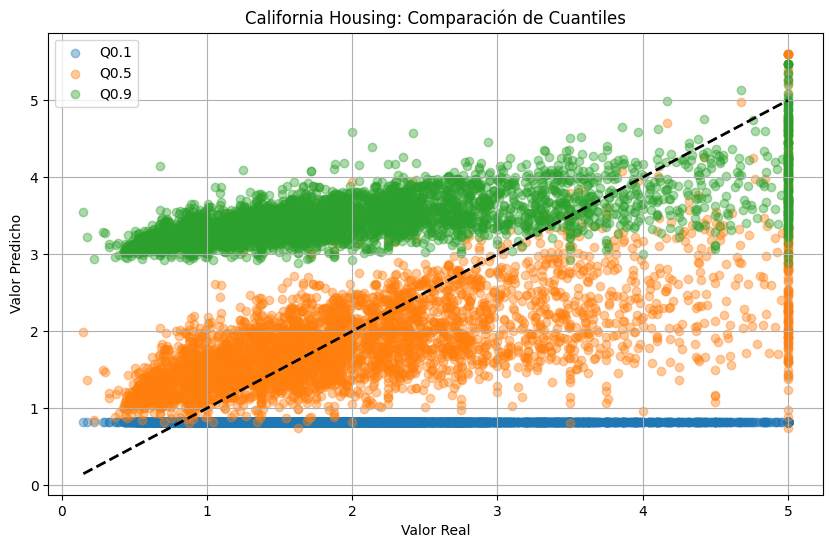

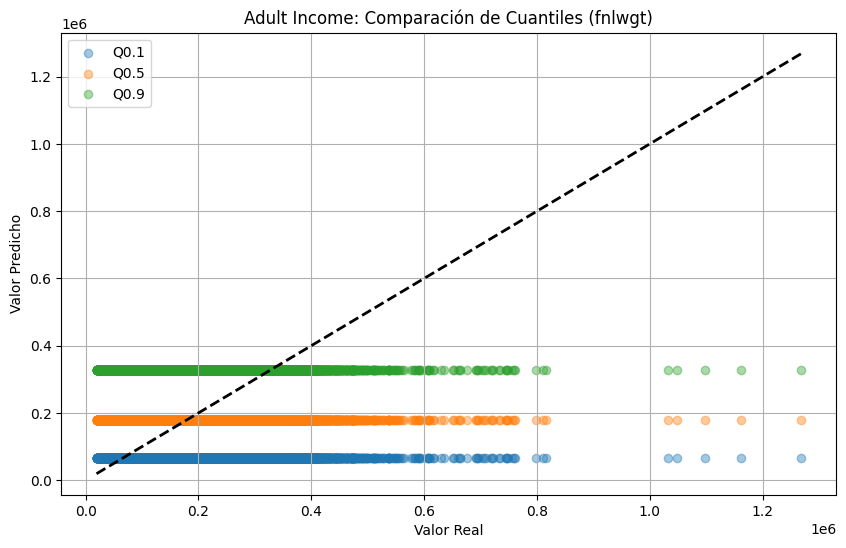

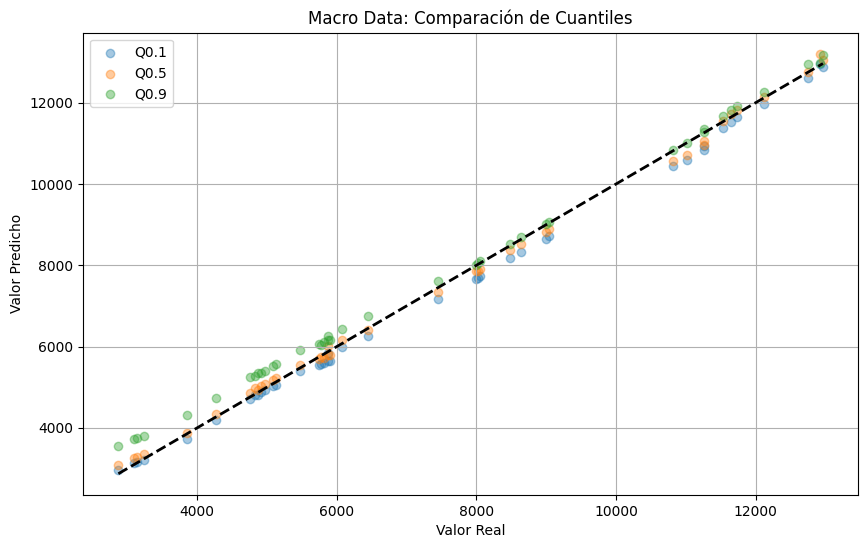


Resumen Comparativo de mean_pinball_loss
Dataset   Adult Income  California      Macro
Quantile                                     
0.1       14861.889552    0.141771  20.016990
0.5       38652.092316    0.314295  60.308475
0.9       21769.918021    0.209472  27.317430


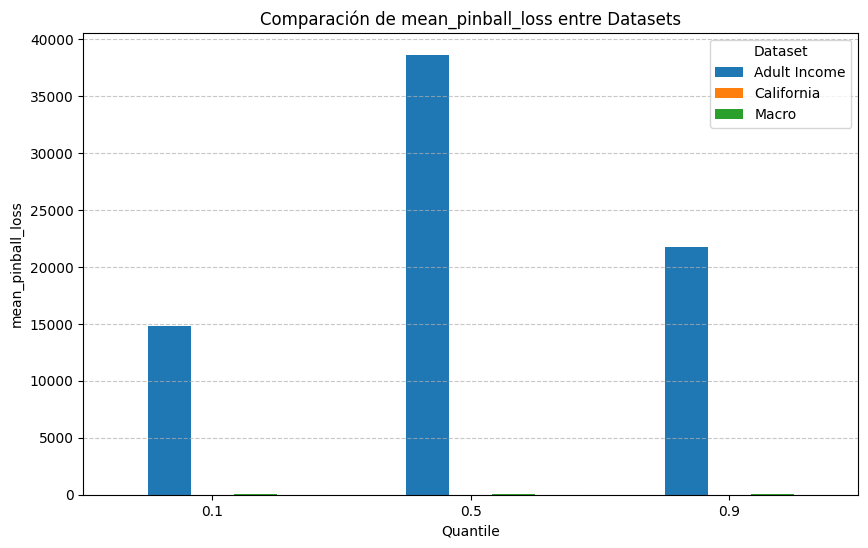

In [ ]:
from sklearn.linear_model import QuantileRegressor
from sklearn.metrics import mean_pinball_loss

from sklearn.metrics import mean_pinball_loss
from sklearn.linear_model import QuantileRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definimos los cuantiles de interés
quantiles = [0.1, 0.5, 0.9]

# 1. California Housing Dataset
print("="*60)
print("California Housing Dataset")
print("="*60)

results_cal = []
for q in quantiles:
    qr = QuantileRegressor(quantile=q, alpha=0.1, solver='highs')
    qr.fit(X_cal_train_scaled, y_cal_train)

    y_pred = qr.predict(X_cal_test_scaled)
    loss = mean_pinball_loss(y_cal_test, y_pred, alpha=q)

    results_cal.append({
        'Quantile': q,
        'Pinball Loss': loss,
        'Model': qr
    })

    coef_df = pd.DataFrame({
        'Feature': X_cal.columns,
        'Coefficient': qr.coef_
    }).sort_values(by='Coefficient', ascending=False)

    print(f"\nQuantile {q}:")
    print(f"Pinball Loss: {loss:.4f}")
    print("\nTop 5 Features:")
    print(coef_df.head(5))

# 2. Adult Income Dataset
print("\n" + "="*60)
print("Adult Income Dataset (fnlwgt como target)")
print("="*60)

results_adult = []
for q in quantiles:
    qr = QuantileRegressor(quantile=q, alpha=0.1, solver='highs')
    qr.fit(X_adult_train_scaled, y_adult_train)

    y_pred = qr.predict(X_adult_test_scaled)
    loss = mean_pinball_loss(y_adult_test, y_pred, alpha=q)

    results_adult.append({
        'Quantile': q,
        'Pinball Loss': loss,
        'Model': qr
    })

    coef_df = pd.DataFrame({
        'Feature': X_adult_encoded.columns,
        'Coefficient': qr.coef_
    }).sort_values(by='Coefficient', ascending=False)

    print(f"\nQuantile {q}:")
    print(f"Pinball Loss: {loss:.4f}")
    print("\nTop 5 Features:")
    print(coef_df.head(5))

# 3. Macroeconomic Dataset
print("\n" + "="*60)
print("Macroeconomic Dataset")
print("="*60)

results_macro = []
for q in quantiles:
    qr = QuantileRegressor(quantile=q, alpha=0.1, solver='highs')
    qr.fit(X_macro_train_scaled, y_macro_train)

    y_pred = qr.predict(X_macro_test_scaled)
    loss = mean_pinball_loss(y_macro_test, y_pred, alpha=q)

    results_macro.append({
        'Quantile': q,
        'Pinball Loss': loss,
        'Model': qr
    })

    coef_df = pd.DataFrame({
        'Feature': X_macro.columns,
        'Coefficient': qr.coef_
    }).sort_values(by='Coefficient', ascending=False)

    print(f"\nQuantile {q}:")
    print(f"Pinball Loss: {loss:.4f}")
    print("\nCoeficientes:")
    print(coef_df)

# Visualización comparativa
def plot_quantile_comparison(y_true, pred_dict, title):
    plt.figure(figsize=(10, 6))
    for q, pred in pred_dict.items():
        plt.scatter(y_true, pred, alpha=0.4, label=f'Q{q}')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)],
             'k--', lw=2)
    plt.xlabel('Valor Real')
    plt.ylabel('Valor Predicho')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualizaciones
print("\nVisualizaciones:")

# California Housing
pred_dict_cal = {
    '0.1': results_cal[0]['Model'].predict(X_cal_test_scaled),
    '0.5': results_cal[1]['Model'].predict(X_cal_test_scaled),
    '0.9': results_cal[2]['Model'].predict(X_cal_test_scaled)
}
plot_quantile_comparison(y_cal_test, pred_dict_cal, 'California Housing: Comparación de Cuantiles')

# Adult Income
pred_dict_adult = {
    '0.1': results_adult[0]['Model'].predict(X_adult_test_scaled),
    '0.5': results_adult[1]['Model'].predict(X_adult_test_scaled),
    '0.9': results_adult[2]['Model'].predict(X_adult_test_scaled)
}
plot_quantile_comparison(y_adult_test, pred_dict_adult, 'Adult Income: Comparación de Cuantiles (fnlwgt)')

# Macro Data
pred_dict_macro = {
    '0.1': results_macro[0]['Model'].predict(X_macro_test_scaled),
    '0.5': results_macro[1]['Model'].predict(X_macro_test_scaled),
    '0.9': results_macro[2]['Model'].predict(X_macro_test_scaled)
}
plot_quantile_comparison(y_macro_test, pred_dict_macro, 'Macro Data: Comparación de Cuantiles')

# Resumen comparativo
summary_data = {
    'Dataset': ['California']*3 + ['Adult Income']*3 + ['Macro']*3,
    'Quantile': quantiles*3,
    'Pinball Loss': [x['Pinball Loss'] for x in results_cal] +
                   [x['Pinball Loss'] for x in results_adult] +
                   [x['Pinball Loss'] for x in results_macro]
}

summary_df = pd.DataFrame(summary_data)
pivot_summary = summary_df.pivot(index='Quantile', columns='Dataset', values='Pinball Loss')

print("\n" + "="*60)
print("Resumen Comparativo de mean_pinball_loss")
print("="*60)
print(pivot_summary)

# Gráfico comparativo
pivot_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de mean_pinball_loss entre Datasets')
plt.ylabel('mean_pinball_loss')
plt.xlabel('Quantile')
plt.xticks(rotation=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

**7.- Vector Autoregresivo (VAR)**


Criterios de selección de lags:
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        34.10       34.15   6.455e+14       34.12
1        20.22       20.42   6.019e+08       20.30
2        19.73      20.09*   3.706e+08      19.88*
3        19.71       20.22   3.623e+08       19.92
4       19.70*       20.37  3.580e+08*       19.97
5        19.73       20.55   3.691e+08       20.06
6        19.78       20.76   3.900e+08       20.18
7        19.82       20.95   4.048e+08       20.28
8        19.83       21.12   4.100e+08       20.35
9        19.85       21.30   4.219e+08       20.44
10       19.90       21.50   4.444e+08       20.55
--------------------------------------------------

Lag óptimo seleccionado: 4

Resumen del modelo VAR:
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 28, Jul, 2025
Time:    

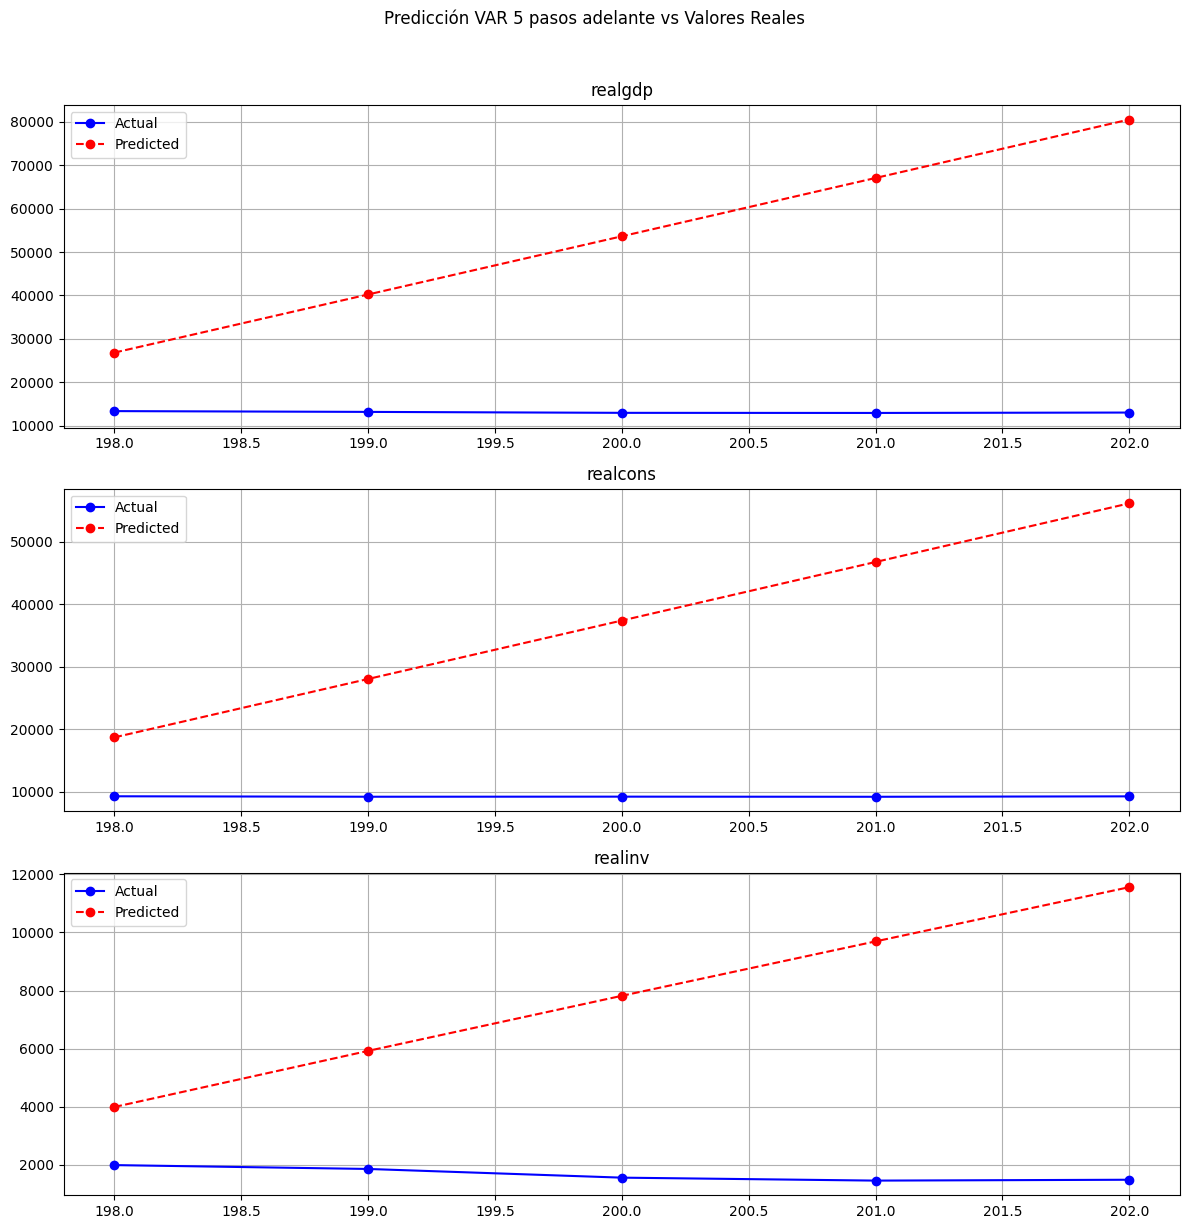

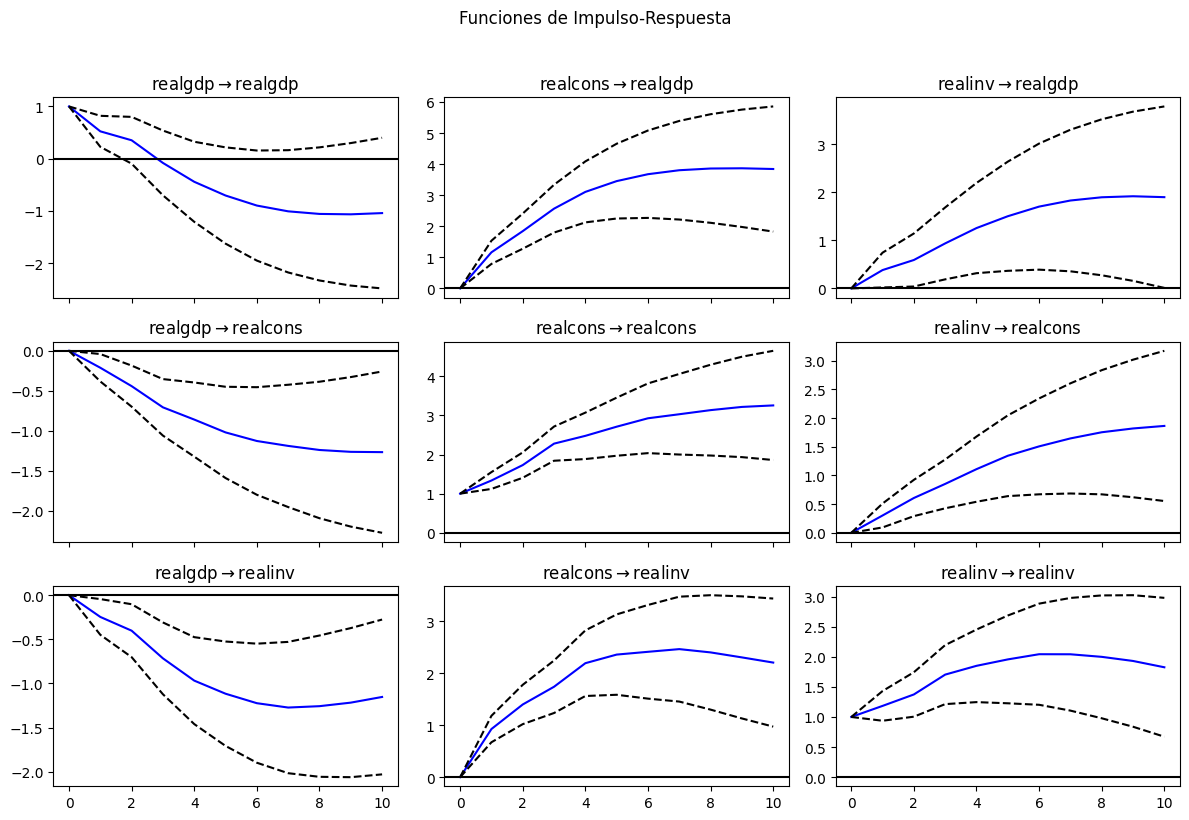

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller


macro_data = macro[['realgdp', 'realcons', 'realinv']]

macro_data = macro_data.dropna()


train = macro_data[:-5]
test = macro_data[-5:]

# Crear modelo VAR
model = VAR(train)

# Seleccionar orden óptimo de lags
lag_results = model.select_order(maxlags=10)
print("\nCriterios de selección de lags:")
print(lag_results.summary())

# Seleccionar el lag con menor criterio AIC
optimal_lag = lag_results.aic
print(f"\nLag óptimo seleccionado: {optimal_lag}")


# Entrenar modelo con lag óptimo
var_model = model.fit(optimal_lag)
print("\nResumen del modelo VAR:")
print(var_model.summary())

# Realizar predicción
forecast = var_model.forecast(train.values[-optimal_lag:], steps=5)
forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)

# Revertir la diferenciación
def invert_diff(forecast_diff, last_obs, original_data):
    return last_obs + forecast_diff.cumsum()

# Invertir la diferenciación para cada variable
final_forecast = pd.DataFrame()
for col in forecast_df.columns:
    last_value = macro_data[col].iloc[-6]  # Último valor antes del test
    final_forecast[col] = invert_diff(forecast_df[col], last_value, macro_data[col])

# Comparar con valores reales
actual_values = macro_data[-5:]

print("\nPredicción vs Valores Reales:")
comparison = pd.concat({
    'Actual': actual_values.stack(),
    'Predicción': final_forecast.stack()
}, axis=1)
print(comparison)

# Calcular errores de predicción
errors = {}
for col in actual_values.columns:
    mae = np.mean(np.abs(actual_values[col] - final_forecast[col]))
    rmse = np.sqrt(np.mean((actual_values[col] - final_forecast[col])**2))
    errors[col] = {'MAE': mae, 'RMSE': rmse}

print("\nMétricas de Error:")
print(pd.DataFrame(errors).T)


# Gráficos de predicción vs real
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))
for i, col in enumerate(actual_values.columns):
    axes[i].plot(actual_values.index, actual_values[col], 'bo-', label='Actual')
    axes[i].plot(final_forecast.index, final_forecast[col], 'ro--', label='Predicted')
    axes[i].set_title(col)
    axes[i].legend()
    axes[i].grid(True)

plt.suptitle('Predicción VAR 5 pasos adelante vs Valores Reales', y=1.02)
plt.tight_layout()
plt.show()

# Gráfico de impulso-respuesta
irf = var_model.irf(10)
irf.plot(orth=False, figsize=(12, 8))
plt.suptitle('Funciones de Impulso-Respuesta', y=1.02)
plt.tight_layout()
plt.show()

